# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6      1.1e+07   1.1e+07    0:00.0
1     12     1327148   1327148    0:00.0
2     18     1327148   2266532    0:00.0
3     24     1256807   1256807    0:00.0
20    126    1211437   1211745    0:00.0
40    246    1211183   1211183    0:00.1
60    366    1192883   1192883    0:00.1
80    486    104348.6  141312.8   0:00.1
100   606    101723    101728.6   0:00.1
120   726    101719.5  101719.5   0:00.2
140   846    101719.5  101719.5   0:00.2
160   966    101719.5  101719.5   0:00.2
180   1086   101719.5  101719.5   0:00.2
200   1206   101719.5  101719.5   0:00.3
220   1326   101719.5  101719.5   0:00.3
240   1446   101719.5  101719.5   0:00.3
260   1566   101719.5  101719.5   0:00.3
280   1686   101719.5  101719.5   0:00.4
300   1806   101719.5  101719.5   0:00.4
320   1926   101719.5  101719.5   0:00.4
340 

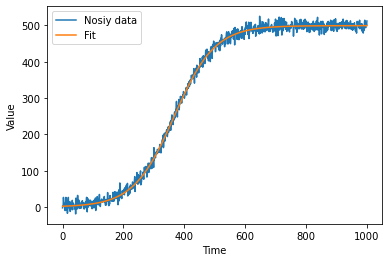

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.CMAES
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values, label='Nosiy data')
plt.plot(times, problem.evaluate(found_parameters), label='Fit')
plt.legend()
plt.show()